<div class="alert alert-block alert-info">
# fifa analysis: distributions of ratings 
---

# summary
* my goal is to accurately describe the distribution of ratings across all positions.
* I use the standardization formula for normal distributions, and arrive at a bimodal distribution.


# context
This is an exercise I have created to practice analytics. I am using a dataset from kaggle.com that represents individual fifa players. My goal is to provide insights for a team manager from the data. I assume that the team manager wants to optimize for the most skilled team that brings the most money.
   
#### data
* Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
* Player performance attributes (Overall, Potential, Aggression, Agility etc.)
* Player preferred position and ratings at all positions.

#### key features
* Overall: overall rating of a player, on a scale from 1 to 100.
* Potential: the highest overall rating a player could progress to.
* Value: current market value of a player, annually
* Wage: the weekly wage of a player
---


### problem 
What does the distribution of a player's ratings over different positions look like?

### hypothesis
the distribution is random for any given player. in aggregate,the distribution is normal.

### assumptions
* we do not care about distinguishing positions. we only care to know the distribution of ratings.
* combining the distributions of individual players into an aggregate distribution as explanatory power.

### procedure
* remove all null values
* first attempt: normalize the data by setting the minimum as the floor, and set the max as the ceiling
* second attempt: normalize the data by subtracting the mean to from every value,and then divide by standard deviation

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
players = pd.read_csv("CompleteDataset_replacements.csv",index_col='index')
players.head()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst,age_adjusted_overall
index,,,,,,,,,,,,,,,,,,,,,
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,89.0,92.0,91.0,66.0,92.0,92.0,"['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST']","['ST', 'LW']",0.0,91.892183
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,90.0,88.0,91.0,62.0,88.0,92.0,"['CAM', 'CF', 'LAM', 'LF', 'LW', 'RAM', 'RF', ...",['RW'],0.0,90.457849
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,87.0,84.0,89.0,64.0,84.0,89.0,"['CAM', 'CF', 'LAM', 'LF', 'LW', 'RAM', 'RF', ...",['LW'],0.0,92.000000
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,85.0,88.0,87.0,68.0,88.0,88.0,"['CAM', 'CF', 'LAM', 'LF', 'LS', 'LW', 'RAM', ...",['ST'],0.0,89.485184
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,89.550407


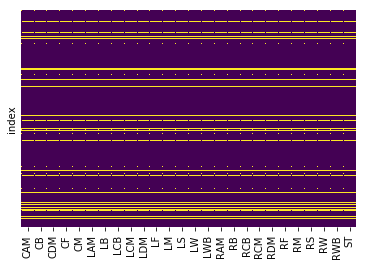

In [64]:
# first, find null values
position_list = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB',
           'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 
           'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 
            'RS', 'RW', 'RWB', 'ST']

sns.heatmap(players[position_list].isnull(),
            yticklabels=False,cbar=False,cmap='viridis')

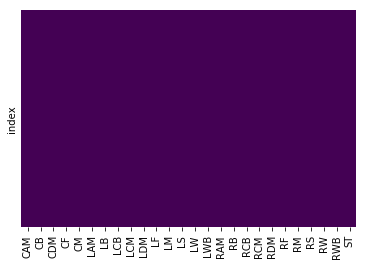

In [65]:
# goalkeepers do not have ratings for any of the positions
# I know this from a previous analysis
# we need to remove them,and make sure that there are no other null values
# this will allow us to make histograms
def filterGoalkeepers(entry):
    if 'GK' in entry['best_positions']:
        return False
    else:
        return True
    
not_goalkeepers = players[players.apply(filterGoalkeepers,axis=1)][position_list]

sns.heatmap(not_goalkeepers.isnull(),
            yticklabels=False,cbar=False,cmap='viridis')
# apparently all players are rated on all positions,except for goalkeepers

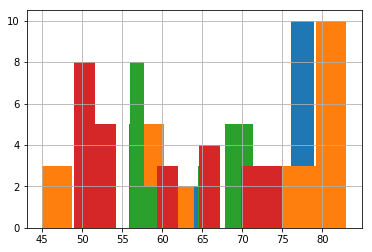

In [66]:
not_goalkeepers.loc[552].hist(bins=10)
not_goalkeepers.loc[128].hist(bins=10)
not_goalkeepers.loc[2087].hist(bins=10)
not_goalkeepers.loc[1452].hist(bins=10)
# I don't see any trends arising here

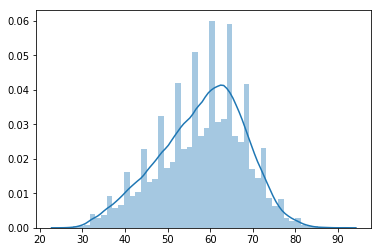

In [67]:
sns.distplot(not_goalkeepers.values.flatten(),hist=True)
# we don't see the same trend in the aggregate
# I think this is because players have different maximum skill ratings
# # so I need to normalize maximums and minimums

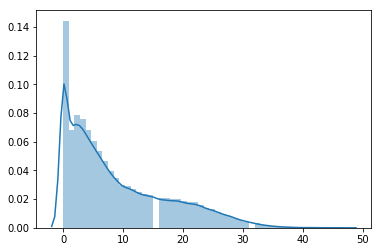

In [68]:
# let's see how consistent this trend is by aggregating across players
# first we need to normalize the min  for each player
def setFloor(entry):
    return entry - entry.min()

floored = not_goalkeepers.apply(setFloor,axis=1)
sns.distplot(floored.values.flatten(),hist=True)

In [69]:
# now we need to normalize the max for each player
# set equal to 100

def findCoefficient(entry):
    return 100/entry.max()

floored['coefficients'] = floored.apply(findCoefficient,axis=1)

In [70]:
def multiplyCoefficient(entry):
    return entry[position_list] * entry['coefficients']

normalized = floored.apply(multiplyCoefficient,axis=1)

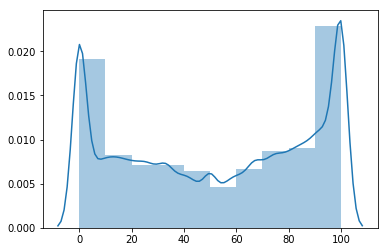

In [71]:
sns.distplot(normalized.values.flatten(),hist=True,bins=10)
# this does not look right
# I see that by setting a floor and a ceiling, 
# I artificially create a higher density of values at each end
# I am going to try a new technique

# second attempt: using standardization for normal distributions 

In [72]:
# I'm going to try normalizing as you would a normal distribution
# I'm going to apply this math to every row individually

# subtract the mean
def standardize(entry):
    mod = entry - entry.mean()
    return mod/entry.std()

standardized = not_goalkeepers.apply(standardize,axis=1)

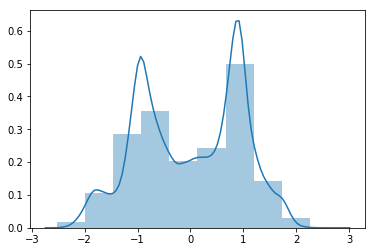

In [73]:
sns.distplot(standardized.values.flatten(),hist=True,bins=10)
# this looks like the most diplomatic normalization for a random distribution

# conclusion
My goal was to describe what the distribution of a players ratings looks like over all this positions. I applied the standardization function use for normal distributions. I don't know whether this is correct.this still needs to be validated.

The final distribution is bimodal. I don't know what conclusions to draw from this without further study.

### further study
it is common to interpret bimodal distributions as showing that in the sample set there are in fact 2 distinct normal distributions that have a little overlap. 1 distribution is skewed left,the other is skewed right. These would represent players who are either specialists ( skewed left), or generalists (skewed right). A specialist is a player who is good only in a few positions,but bad in all the rest. A generalist is a player who is good at many positions. I don't know if this is true, but it would be interesting to investigate. 
* somehow dissect the players so that you have clustered the 2 normal distributions present.
* compare these clusters to see if there are any distinguishing characteristics.
* distilling these characteristics may allow us to predict more accurately the type of distribution a players ratings falls into, whether they are generalists or specialists.